# Logistic Regression 

- Here we gonna develope a classification model based on logistic regression
- We will use COVID data and our Dependant variable will be "mortality"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import pylab as pl

## 1) CSV to DataFrame

In [2]:
Data = pd.read_csv ("COVID.csv")
Data.head ()

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_11464\320169126.py:1: DtypeWarning: Columns (5,9,12,13,14,18,19,20,24,25,32,33,36,37,41,44,45,48,49,50,52,53,54,56,57,58,59,61,63,64,65,69,74,76,78,79,81,83,84,85,86,87,88,90,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,113,114,116,117,119,120,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,153,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,297,298,299,300,301,305,306,307,308,310,311,31

,Patient_Number,Patient_Phase,Patient_Hospital,Patient_AdmitDate,Patient_DischargeDate,Patient_C19Variant,Outcome_InhospitalMortality,Outcome_LOS,Outcome_ICUadmission,Outcome_ICULOS,...,LAB_TotalProtein_First,LAB_TSH_First,LAB_T4_First,LAB_T3_First,LAB_VitD3_First,LAB_Zinc_y_First,LAB_IgM_First,LAB_IgG_First,LAB_SARSCOV2Egene_First,LAB_SARSCOV2RDRP_First
0,1,Phase 2,Hospital1,1400/05/21,NaN,Delta,Died,30.0,1,25,...,NaN,NaN,NaN,NaN,11.2,NaN,NaN,NaN,Positive,Positive CT:28.5
1,2,Phase 2,Hospital1,1400/05/29,NaN,Delta,Died,19.0,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:18.0
2,3,Phase 2,Hospital1,1400/06/17,NaN,Delta,Died,12.0,1,11,...,NaN,NaN,NaN,NaN,39.9,NaN,NaN,NaN,NaN,NaN
3,4,Phase 2,Hospital1,1400/02/04,NaN,NaN,Survived,18.0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:20.9
4,5,Phase 2,Hospital1,1400/02/04,NaN,NaN,Survived,18.0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:20.9


## 2) Let's make Data smaller

- I need a smaller dataframe consist of X,Y
- unlike previous code, I'm going to evolve and chose my favourite columns here

In [3]:
Data_columns = Data.columns.tolist()
print (Data_columns)

['Patient_Number', 'Patient_Phase', 'Patient_Hospital', 'Patient_AdmitDate', 'Patient_DischargeDate', 'Patient_C19Variant', 'Outcome_InhospitalMortality', 'Outcome_LOS', 'Outcome_ICUadmission', 'Outcome_ICULOS', 'Demographic_Age', 'Demographic_Gender', 'Demographic_Height ', 'Demographic_Weight', 'symtpm_to_referral', 'Symptom_Caugh', 'Symptom_Dyspnea', 'Symptom_Fever', 'Symptom_Chiver', 'Symptom_Mylagia', 'Symptom_Weakness', 'Symptom_LOC', 'Symptom_Sore through', 'Symptom_Rhinorrhea', 'Symptom_Smelling disorder', 'Symptom_nauseaVomit', 'Symptom_Anorexia', 'Symptom_Diarhhea', 'Symptom_ChestPain', 'Symptom_Seizure', 'Symptom_SkinLesion', 'Symptom_Jointpain', 'Symptom_Headache', 'Symptom_AbdominalPain', 'Symptom_Earpain', 'Symptom_Hemorrhasia', 'Symptom_Hemiparesia', 'MH_Pregcy', 'Symptom_Other symptoms', 'MH_CurremtSmoker', 'MH_Alcoholuser', 'MH_Opiumuser', 'MH_Hookahuser', 'MH_Otherdiseases', 'MH_HTN', 'MH_IHD', 'MH_CABG', 'MH_CHF', 'MH_Ashtma', 'MH_COPD', 'MH_DM', 'MH_Pneumonia', 'MH_

In [4]:
list_of_variables = ['Patient_Hospital', 'Outcome_InhospitalMortality', 
                     'Demographic_Age', 'Demographic_Gender',
                     'Symptom_LOC','Symptom_ChestPain', 'MH_CurremtSmoker', 'MH_IHD','VS_O2satwithoutsupp']
cdf = Data [list_of_variables]
cdf.head ()

,Patient_Hospital,Outcome_InhospitalMortality,Demographic_Age,Demographic_Gender,Symptom_LOC,Symptom_ChestPain,MH_CurremtSmoker,MH_IHD,VS_O2satwithoutsupp
0,Hospital1,Died,33.0,Male,0.0,0,0,0,80.0
1,Hospital1,Died,44.0,Male,0.0,1,0,0,77.0
2,Hospital1,Died,50.0,Male,0.0,0,1,0,60.0
3,Hospital1,Survived,71.0,Male,0.0,0,1,0,71.0
4,Hospital1,Survived,71.0,Male,0.0,0,1,0,71.0


## 3) Data cleaning

- I just wanna clean data in the same code in order to tell everyone that data cleaning is the the most time consuming part of any programming
- the imputation method for continious variables would be "Model-based Imputation"

In [5]:
for i in range (0, len (list_of_variables)):
    print (cdf [list_of_variables[i]].value_counts())
    
missing_counts = cdf.isnull().sum()
print(missing_counts)

Hospital1    4784
Hospital3    1749
Hospital2    1429
Hospital4    1172
Name: Patient_Hospital, dtype: int64
Survived    7239
Died        1816
Unknown       79
Name: Outcome_InhospitalMortality, dtype: int64
50.000     205
65.000     200
60.000     192
67.000     189
62.000     184
          ... 
798.000      1
0.250        1
9.000        1
0.125        1
0.170        1
Name: Demographic_Age, Length: 103, dtype: int64
Male      4942
Female    4132
1           35
2           24
0            1
Name: Demographic_Gender, dtype: int64
0.0    8404
1.0     729
Name: Symptom_LOC, dtype: int64
0    8315
1     819
Name: Symptom_ChestPain, dtype: int64
0    8679
1     455
Name: MH_CurremtSmoker, dtype: int64
0    6113
0    1782
1     973
1     265
١       1
Name: MH_IHD, dtype: int64
90.0    654
88.0    565
92.0    526
95.0    514
93.0    499
       ... 
42.0      1
34.0      1
87.5      1
36.0      1
37.0      1
Name: VS_O2satwithoutsupp, Length: 76, dtype: int64
Patient_Hospital                

In [6]:
# patient hospital

cdf.dropna(subset= ["Patient_Hospital"], inplace=True)
cdf ["Patient_Hospital"] = pd.factorize( cdf ["Patient_Hospital"])[0]

# Outcome_InhospitalMortality

outcome_map = {"Survived": 0, "Died" : 1 , "Unknown" : np.nan }
cdf ["Outcome_InhospitalMortality"] = cdf ["Outcome_InhospitalMortality"].replace(outcome_map)
cdf.dropna(subset= ["Outcome_InhospitalMortality"], inplace=True)

# Demographic_Age and 'VS_O2satwithoutsupp'

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(cdf [['Demographic_Age', 'VS_O2satwithoutsupp']])
cdf[['Demographic_Age', 'VS_O2satwithoutsupp']] = imp.transform(cdf[['Demographic_Age', 'VS_O2satwithoutsupp']])

# Demographic_Gender

sex_map = {"1":"Male" , "2":"Female" , "0" : np.nan}
cdf ["Demographic_Gender"] = cdf ["Demographic_Gender"].replace(sex_map)
cdf.dropna(subset=["Demographic_Gender"], inplace=True)
cdf ["Demographic_Gender"] = pd.factorize( cdf ["Demographic_Gender"])[0]


# Symptom_LOC

cdf ["Symptom_LOC"] = cdf ["Symptom_LOC"].astype (float)
cdf.dropna(subset=["Symptom_LOC"], inplace=True)

# Symptom_ChestPain

cdf.dropna(subset=["Symptom_ChestPain"], inplace=True)
cdf ["Symptom_ChestPain"] = cdf ["Symptom_ChestPain"].astype (float)

# MH_CurremtSmoker 

cdf.dropna(subset=["MH_CurremtSmoker"], inplace=True)
cdf ["MH_CurremtSmoker"] = cdf ["MH_CurremtSmoker"].astype (float)

# MH_IHD

cdf.dropna(subset=["MH_IHD"], inplace=True)
cdf ["MH_IHD"] = cdf ["MH_IHD"].astype (float)

missing_counts = cdf.isnull().sum()
print(missing_counts)

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_11464\1854485196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset= ["Patient_Hospital"], inplace=True)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_11464\1854485196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Patient_Hospital"] = pd.factorize( cdf ["Patient_Hospital"])[0]
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_11464\1854485196.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Patient_Hospital               0
Outcome_InhospitalMortality    0
Demographic_Age                0
Demographic_Gender             0
Symptom_LOC                    0
Symptom_ChestPain              0
MH_CurremtSmoker               0
MH_IHD                         0
VS_O2satwithoutsupp            0
dtype: int64


C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_11464\1854485196.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf[['Demographic_Age', 'VS_O2satwithoutsupp']] = imp.transform(cdf[['Demographic_Age', 'VS_O2satwithoutsupp']])
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_11464\1854485196.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Demographic_Gender"] = cdf ["Demographic_Gender"].replace(sex_map)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_11464\1854485196.py:23: 

## 4) X,Y determination

In [7]:
x_list = ['Patient_Hospital', 'Demographic_Age', 'Demographic_Gender','Symptom_LOC',
          'Symptom_ChestPain', 'MH_CurremtSmoker', 'MH_IHD','VS_O2satwithoutsupp']

x = np.asarray (cdf [x_list])
y = np.asarray (cdf ['Outcome_InhospitalMortality'])

## 5) Normalizing data

In [8]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

## 6) Train/Test split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 4)

## 7) Model training and tuning

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
y_hat = LR.predict(x_test)

## 8) Evaluation

- there are various way to determine the presice of our model, let's see what we got

### 8-1) Jaccard index:

- The concept of Jaccard index has been explained in my notebook. To learn more contact : hoseinto@gmail.com


In [11]:
from sklearn.metrics import jaccard_score

# position label means Jaccard are going to be calculated for which one the values of the outcome variable.
# you probably remember when I said we are going to predic (y=1  /x), now you undrestand the following items:  (y=pos_label  /x)
jaccard_score(y_test, y_hat,pos_label=1)

0.25055432372505543

### 8-2) Confusion matrix

confusion matrix is : [[1360   63]
 [ 275  113]]


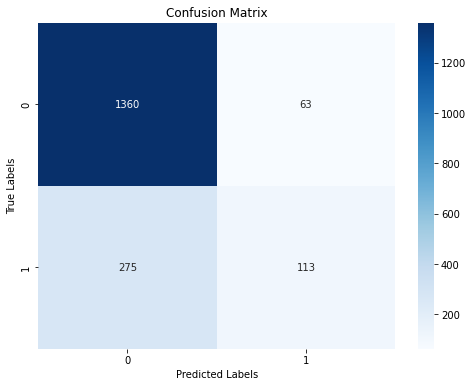

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# plot (?) confusion matrix as numpy array

cm = confusion_matrix(y_test, y_hat)
print ("confusion matrix is :", cm)

# plot

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 8-3) Other way to calculate confusion matrix :) 

Confusion matrix, without normalization
[[ 113  275]
 [  63 1360]]


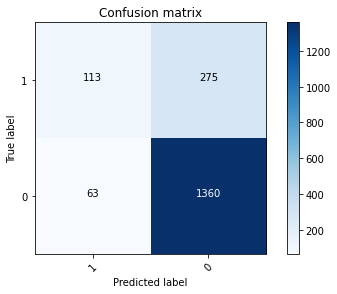

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

### 8-4) F1-score, Precision, Recall 

- Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- Recall is the true positive rate. It is defined as: Recall =  TP / (TP + FN)


- F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

In [14]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1423
         1.0       0.64      0.29      0.40       388

    accuracy                           0.81      1811
   macro avg       0.74      0.62      0.65      1811
weighted avg       0.79      0.81      0.78      1811



### 8-5) LogLoss

- Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [15]:
from sklearn.metrics import log_loss
log_loss(y_test, y_hat)

6.727087159316178